# Forest Experiment
## Import dependencies

In [1]:
import mdptoolbox, mdptoolbox.example
import numpy as np
import matplotlib.pyplot as plt

import time

## Initialize Environment

In [17]:
P, R = mdptoolbox.example.forest(S=8000)
value_f = [0] * 10
policy = [0] * 10
its = [0] * 10
time_arr = [0] * 10
gamma_arr = [0] * 10

## Policy Iteration Analysis

In [18]:
for i in range(0,10):
    gamma = (i + 0.5) / 10
    pi = mdptoolbox.mdp.PolicyIteration(P,R, gamma)
    pi.run()
    gamma_arr[i] = gamma
    value_f[i] = np.mean(pi.V)
    policy[i] = pi.policy
    its[i] = pi.iter
    time_arr[i] = pi.time
    print(f'Summary (gamma = {gamma}):')
    print(f'Average Rewards: {np.mean(pi.V)}')
    print('-----------------------------------------------------------------------')

Summary (gamma = 0.05):
Average Rewards: 1.002545120975238
-----------------------------------------------------------------------
Summary (gamma = 0.15):
Average Rewards: 1.021330475863794
-----------------------------------------------------------------------
Summary (gamma = 0.25):
Average Rewards: 1.06164944042133
-----------------------------------------------------------------------
Summary (gamma = 0.35):
Average Rewards: 1.1295723415520396
-----------------------------------------------------------------------
Summary (gamma = 0.45):
Average Rewards: 1.2366386568215122
-----------------------------------------------------------------------
Summary (gamma = 0.55):
Average Rewards: 1.4058247540481474
-----------------------------------------------------------------------
Summary (gamma = 0.65):
Average Rewards: 1.687168055555729
-----------------------------------------------------------------------
Summary (gamma = 0.75):
Average Rewards: 2.2118029006440154
---------------------

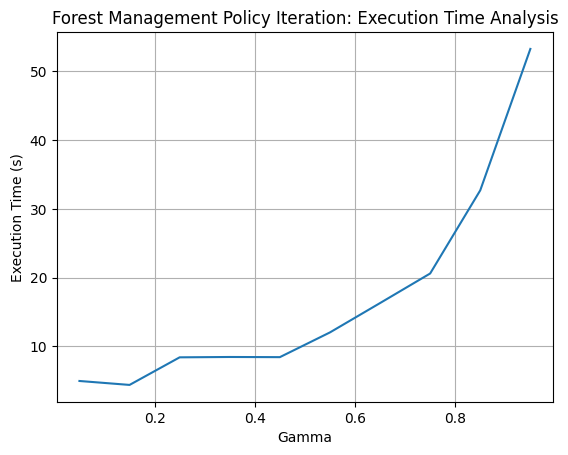

In [4]:
plt.plot(gamma_arr, time_arr)
plt.xlabel('Gamma')
plt.ylabel('Execution Time (s)')
plt.title('Forest Management Policy Iteration: Execution Time Analysis')
plt.grid()
plt.savefig('FMPI time analysis.png')

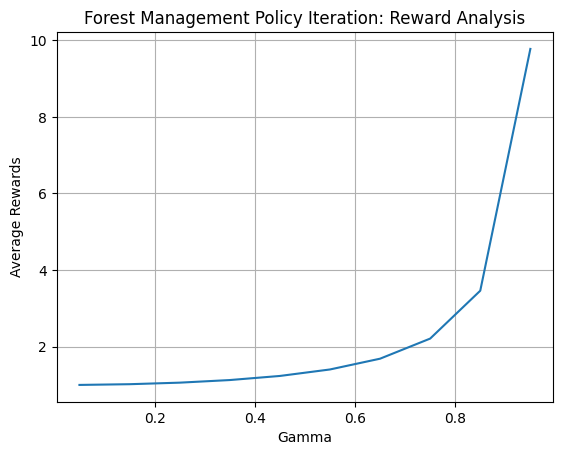

In [5]:
plt.plot(gamma_arr, value_f)
plt.xlabel('Gamma')
plt.ylabel('Average Rewards')
plt.title('Forest Management Policy Iteration: Reward Analysis')
plt.grid()
plt.savefig('FMPL reward analyis.png')

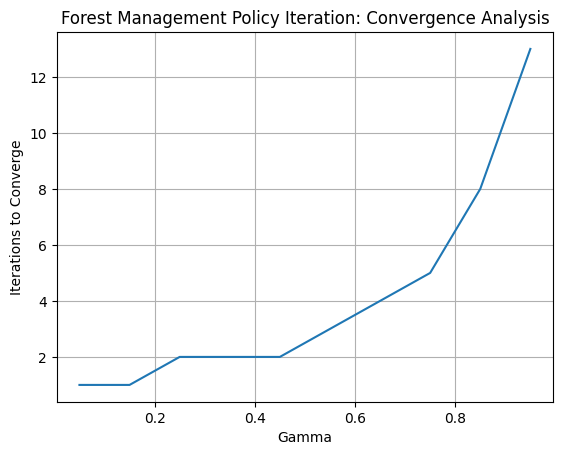

In [6]:
plt.plot(gamma_arr, its)
plt.xlabel('Gamma')
plt.ylabel('Iterations to Converge')
plt.title('Forest Management Policy Iteration: Convergence Analysis')
plt.grid()
plt.savefig('FMPI convergence analysis.png')

## Value Iteration Analysis

In [8]:
for i in range(0, 10):
    gamma = (i + 0.5) / 10
    vi = mdptoolbox.mdp.ValueIteration(P,R,gamma)
    vi.run()
    gamma_arr[i] = gamma
    value_f[i] = np.mean(vi.V)
    policy[i] = vi.policy
    its[i] = vi.iter
    time_arr[i] = vi.time
    
    print(f'Summary (gamma = {gamma}):')
    print(f'Average reward: {np.mean(vi.V)}')
    print('-----------------------------------------------------------------------')

Summary (gamma = 0.05):
Average reward: 1.00025
-----------------------------------------------------------------------
Summary (gamma = 0.15):
Average reward: 1.0205889312500003
-----------------------------------------------------------------------
Summary (gamma = 0.25):
Average reward: 1.0580788300781254
-----------------------------------------------------------------------
Summary (gamma = 0.35):
Average reward: 1.1269815757347657
-----------------------------------------------------------------------
Summary (gamma = 0.45):
Average reward: 1.234087011858836
-----------------------------------------------------------------------
Summary (gamma = 0.55):
Average reward: 1.4016001231655688
-----------------------------------------------------------------------
Summary (gamma = 0.65):
Average reward: 1.6824721967851497
-----------------------------------------------------------------------
Summary (gamma = 0.75):
Average reward: 2.203966898908005
-------------------------------------

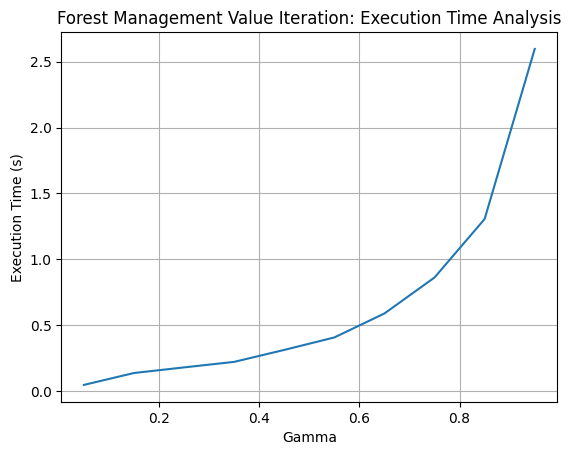

In [9]:
plt.plot(gamma_arr, time_arr)
plt.xlabel('Gamma')
plt.ylabel('Execution Time (s)')
plt.title('Forest Management Value Iteration: Execution Time Analysis')
plt.grid()
plt.savefig('FMVI time analysis.png')

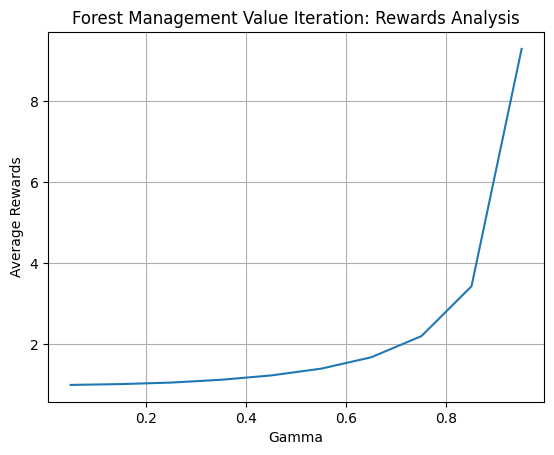

In [10]:
plt.plot(gamma_arr, value_f)
plt.xlabel('Gamma')
plt.ylabel('Average Rewards')
plt.title('Forest Management Value Iteration: Rewards Analysis')
plt.grid()
plt.savefig('FMVI rewards analysis.png')

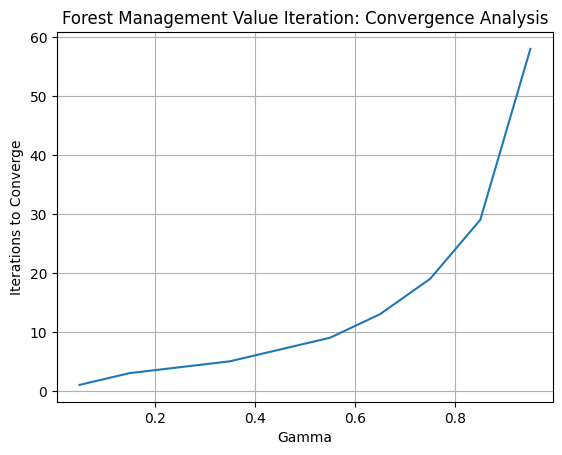

In [11]:
plt.plot(gamma_arr, its)
plt.xlabel('Gamma')
plt.ylabel('Iterations to Converge')
plt.title('Forest Management Value Iteration: Convergence Analysis')
plt.grid()
plt.savefig('FMVI convergence analysis.png')

## Q-Learning Analysis

In [12]:
P, R = mdptoolbox.example.forest(S=8000, p=0.01)
Q_table = []
rew_arr = []

for i in range(0,10):
    epsilon = (i + 0.5) / 10
    start = time.time()
    ql = mdptoolbox.mdp.QLearning(P,R,epsilon)
    end = time.time()
    ql.run()
    rew_arr.append(ql.R)
    value_f[i] = np.mean(ql.V)
    policy[i] = ql.policy
    time_arr[i] = end-start
    Q_table.append(ql.Q)
    
    print(f'Summary (epsilon = {epsilon}):')
    print(f'Average reward: {np.mean(ql.V)}')
    print('-----------------------------------------------------------------------')

Summary (gamma = 0.05):
Average reward: 0.000688610322478349
-----------------------------------------------------------------------
Summary (gamma = 0.15):
Average reward: 0.0006773632827857271
-----------------------------------------------------------------------
Summary (gamma = 0.25):
Average reward: 0.0006461640574694076
-----------------------------------------------------------------------
Summary (gamma = 0.35):
Average reward: 0.0009382091232756847
-----------------------------------------------------------------------
Summary (gamma = 0.45):
Average reward: 0.0008187771384938375
-----------------------------------------------------------------------
Summary (gamma = 0.55):
Average reward: 0.0009190697312759185
-----------------------------------------------------------------------
Summary (gamma = 0.65):
Average reward: 0.0011582867450814203
-----------------------------------------------------------------------
Summary (gamma = 0.75):
Average reward: 0.0014362945583008503
-

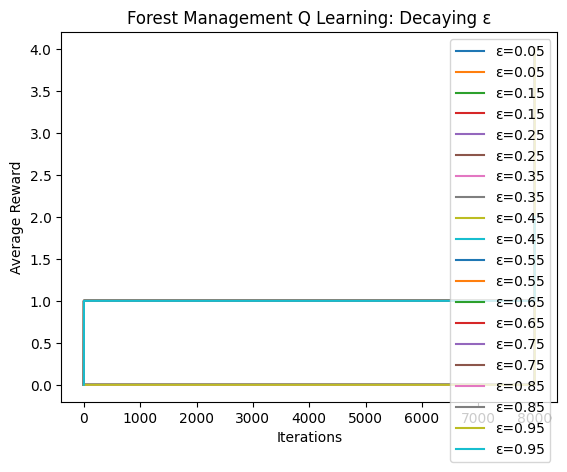

In [13]:
for i in range(0,10):
    epsilon = (i + 0.5) / 10
    plt.plot(range(0,len(rew_arr[i])), rew_arr[i], label='ε=' + str(epsilon))

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title('Forest Management Q Learning: Decaying ε')
plt.savefig('FMQ decay eps.png')

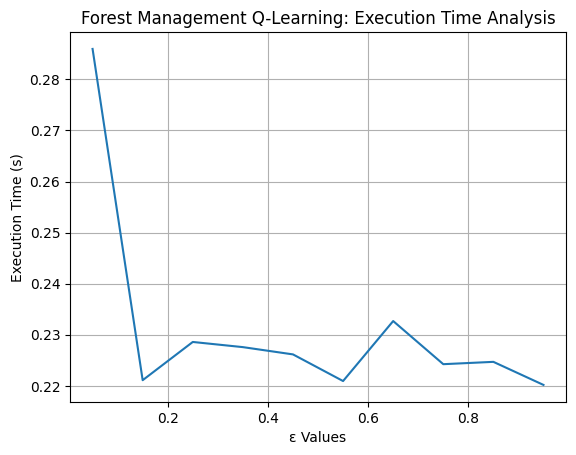

In [14]:
epsilons = []
for i in range(0,10):
    epsilons.append((i + 0.5) / 10)
    
plt.plot(epsilons, time_arr)
plt.xlabel('ε Values')
plt.ylabel('Execution Time (s)')
plt.title('Forest Management Q-Learning: Execution Time Analysis')
plt.grid()
plt.savefig('FMQ time analysis.png')

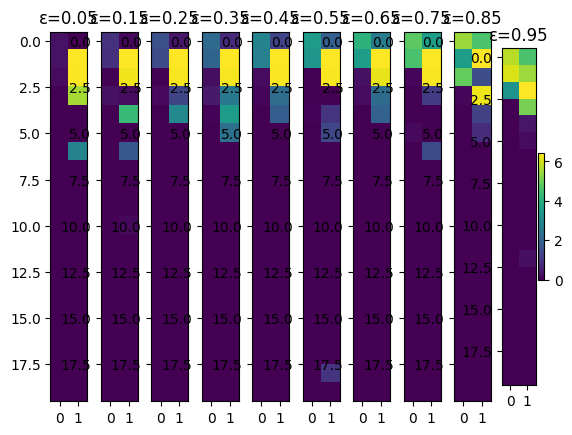

In [16]:
plt.subplot(1,10,1)
plt.imshow(Q_table[0][:20,:])
plt.title('ε=0.05')

plt.subplot(1,10,2)
plt.title('ε=0.15')
plt.imshow(Q_table[1][:20,:])

plt.subplot(1,10,3)
plt.title('ε=0.25')
plt.imshow(Q_table[2][:20,:])

plt.subplot(1,10,4)
plt.title('ε=0.35')
plt.imshow(Q_table[3][:20,:])

plt.subplot(1,10,5)
plt.title('ε=0.45')
plt.imshow(Q_table[4][:20,:])

plt.subplot(1,10,6)
plt.title('ε=0.55')
plt.imshow(Q_table[5][:20,:])

plt.subplot(1,10,7)
plt.imshow(Q_table[6][:20,:])
plt.title('ε=0.65')

plt.subplot(1,10,8)
plt.title('ε=0.75')
plt.imshow(Q_table[7][:20,:])

plt.subplot(1,10,9)
plt.title('ε=0.85')
plt.imshow(Q_table[8][:20,:])

plt.subplot(1,10,10)
plt.title('ε=0.95')
plt.imshow(Q_table[9][:20,:])
plt.colorbar()

plt.savefig('fm ql1.png')